In [47]:
import xarray as xr
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the combined_dataset.csv file
csv_file_path = "TerraClimate_combined.csv"
df_TerrClimate = pd.read_csv(csv_file_path)

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 0 to 1079
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           826 non-null    object 
 1   average_latitude               826 non-null    float64
 2   average_longitude              826 non-null    float64
 3   coordinate_reference_system    826 non-null    float64
 4   water_deficit                  826 non-null    float64
 5   palmer_drought_severity_index  826 non-null    float64
 6   potential_evapotranspiration   826 non-null    float64
 7   precipitation                  826 non-null    float64
 8   maximum_temperature            826 non-null    float64
 9   minimum_temperature            826 non-null    float64
 10  vapor_pressure                 826 non-null    float64
 11  vapor_pressure_deficit         826 non-null    float64
 12  wind_speed                     826 non-null    float64

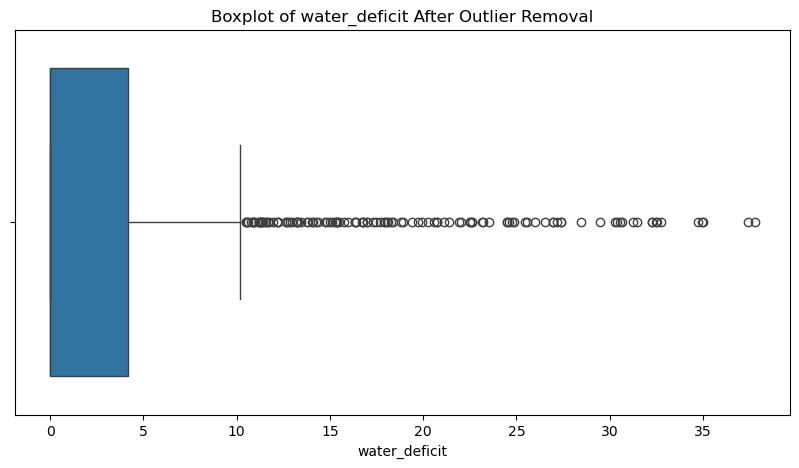

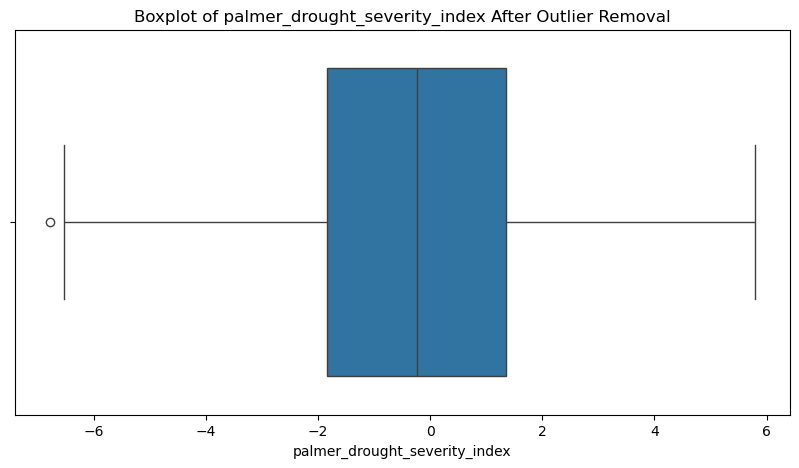

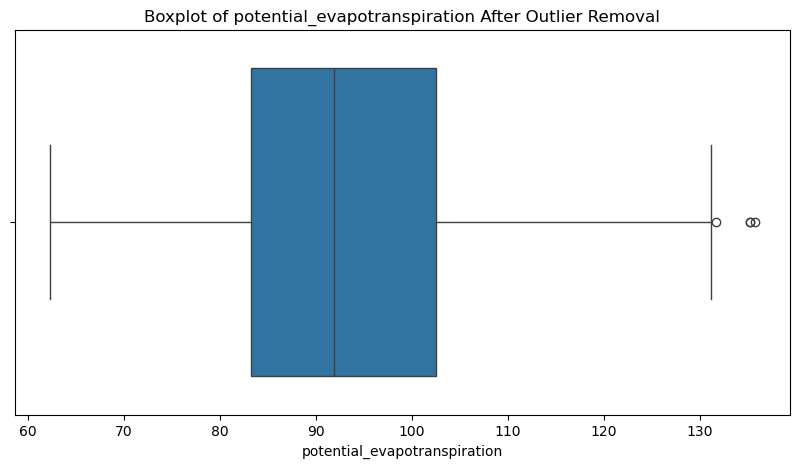

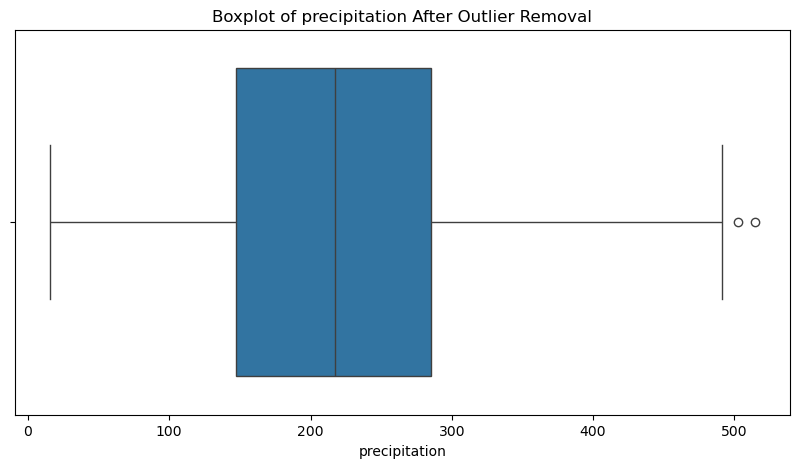

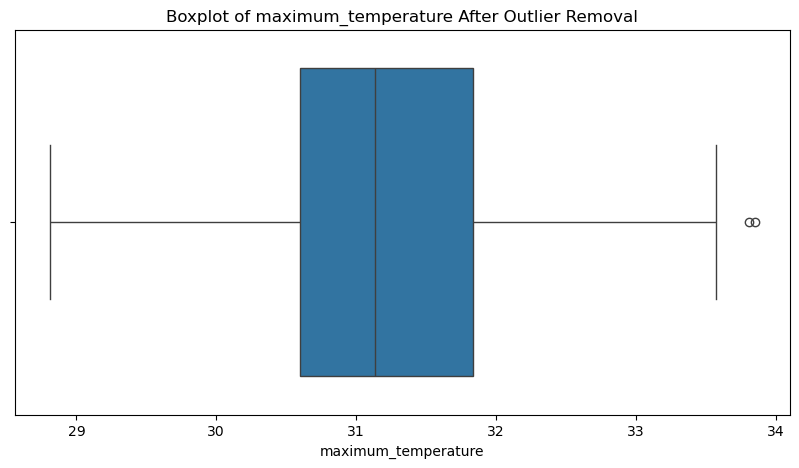

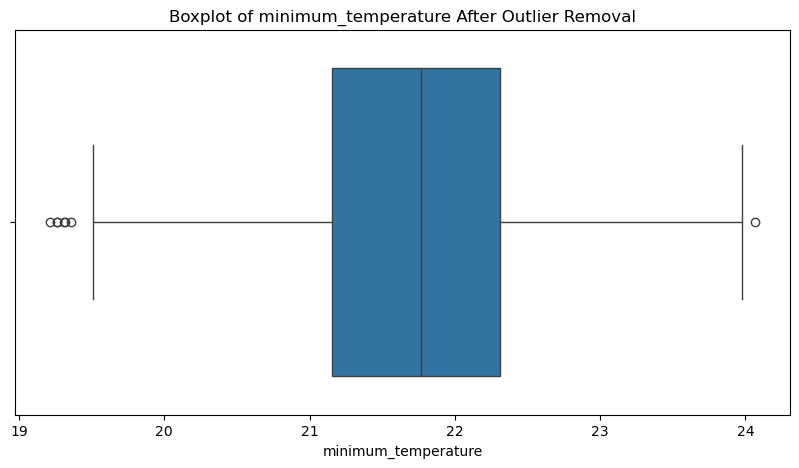

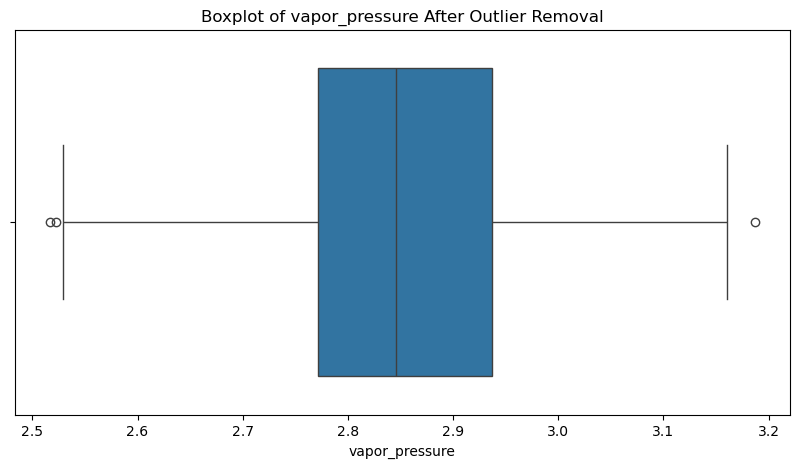

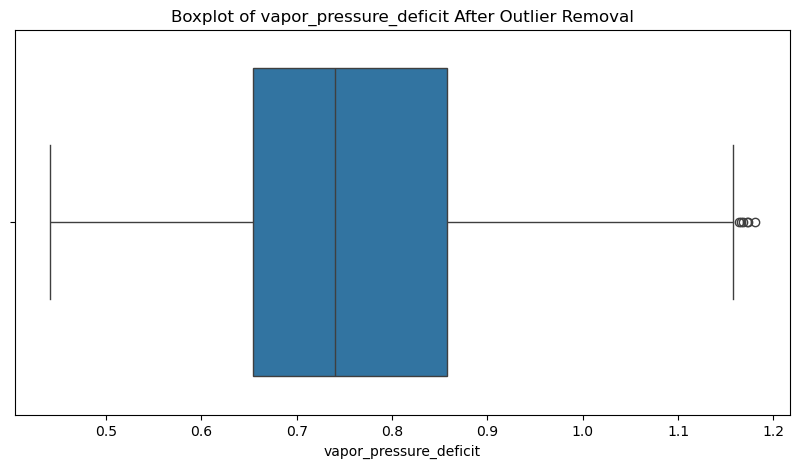

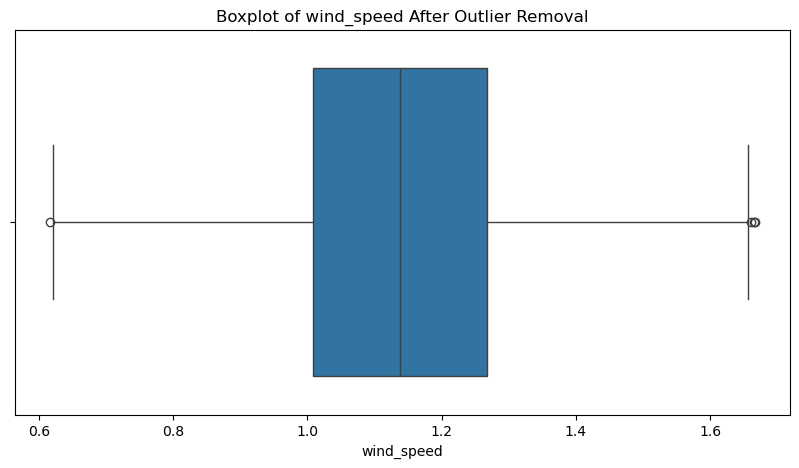

In [49]:
def remove_outliers(data, numeric_columns):
    for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Dynamically filter numeric_columns to include only numeric columns that exist in the DataFrame, excluding latitude and longitude
numeric_columns = [col for col in df_TerrClimate.select_dtypes(include=[np.number]).columns.tolist() if col not in ['average_latitude', 'average_longitude', 'coordinate_reference_system']]

# Apply the remove_outliers function
df_TerrClimate = remove_outliers(df_TerrClimate, numeric_columns)

# Print the cleaned DataFrame
df_TerrClimate.info()

# Plot separate boxplots for each numeric column after outlier removal
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_TerrClimate[col])
    plt.title(f"Boxplot of {col} After Outlier Removal")
    plt.show()

In [50]:
# 3.1 Descriptive Statistics
def descriptive_statistics(data):
    print("Descriptive Statistics:")
    print(data.describe())
    print("\n")

descriptive_statistics(df_TerrClimate)

Descriptive Statistics:
       average_latitude  average_longitude  coordinate_reference_system  \
count        826.000000         826.000000                        826.0   
mean          -4.088857         -65.626160                          3.0   
std            4.335242           5.547611                          0.0   
min          -10.020833         -72.020833                          3.0   
25%          -10.020833         -72.020833                          3.0   
50%           -5.000000         -65.000000                          3.0   
75%            1.000000         -58.000000                          3.0   
max            1.000000         -58.000000                          3.0   

       water_deficit  palmer_drought_severity_index  \
count     826.000000                     826.000000   
mean        3.887806                      -0.251255   
std         7.298067                       2.387631   
min         0.000000                      -6.783229   
25%         0.000000     

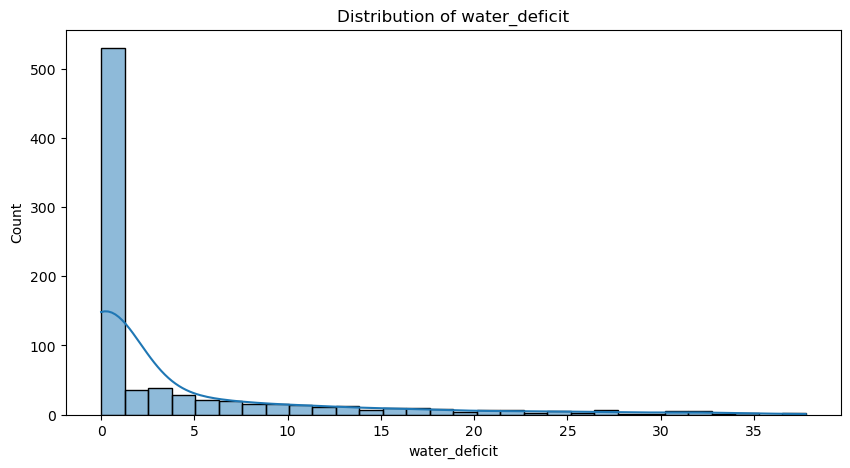

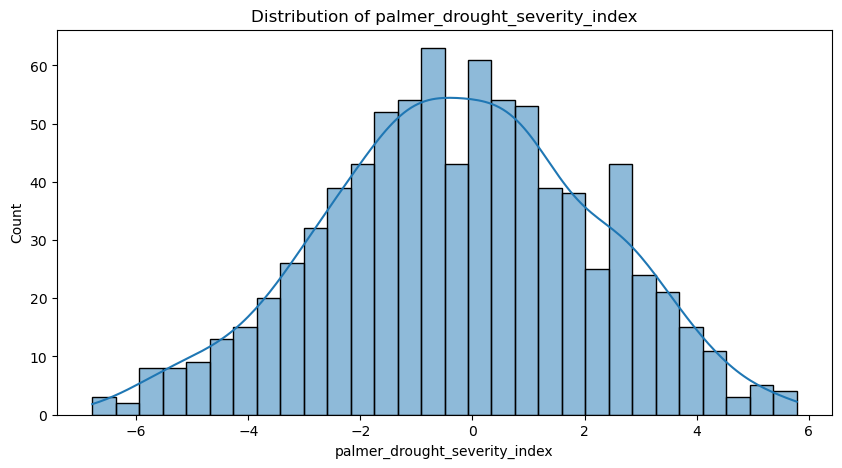

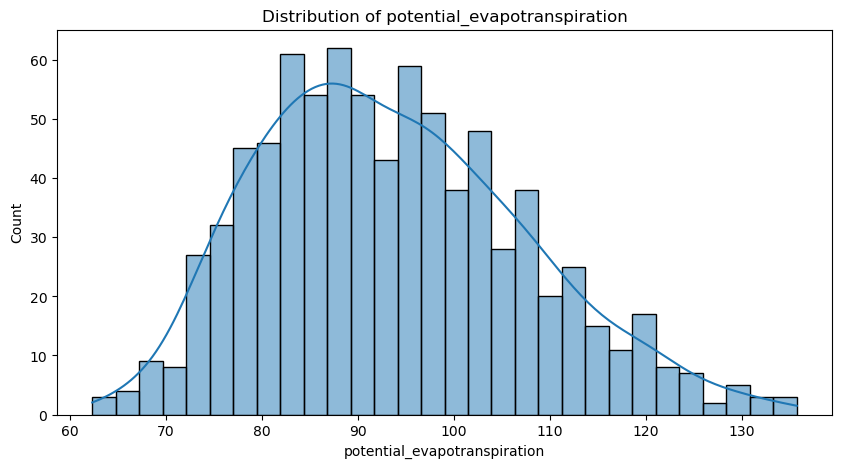

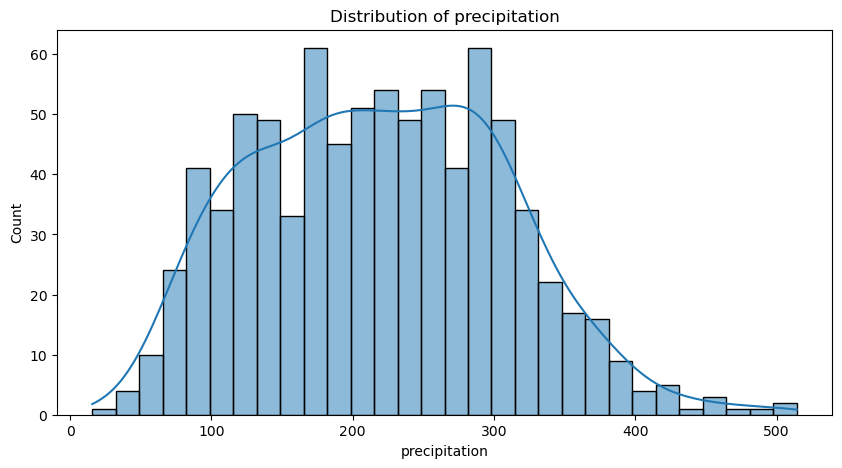

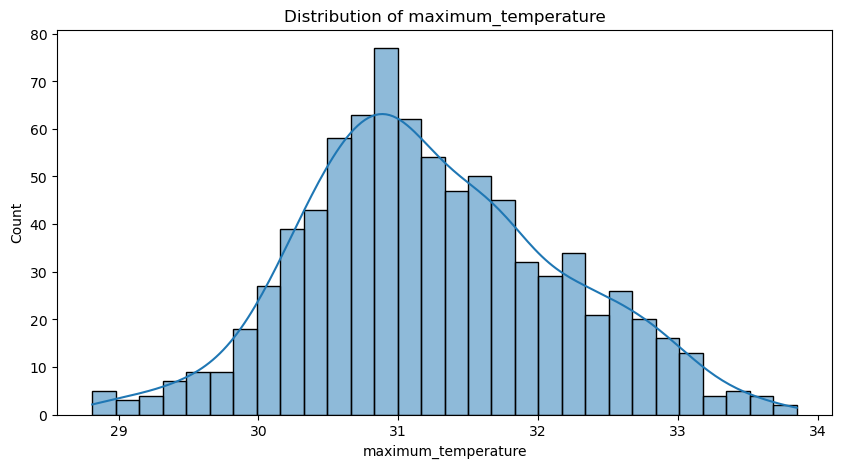

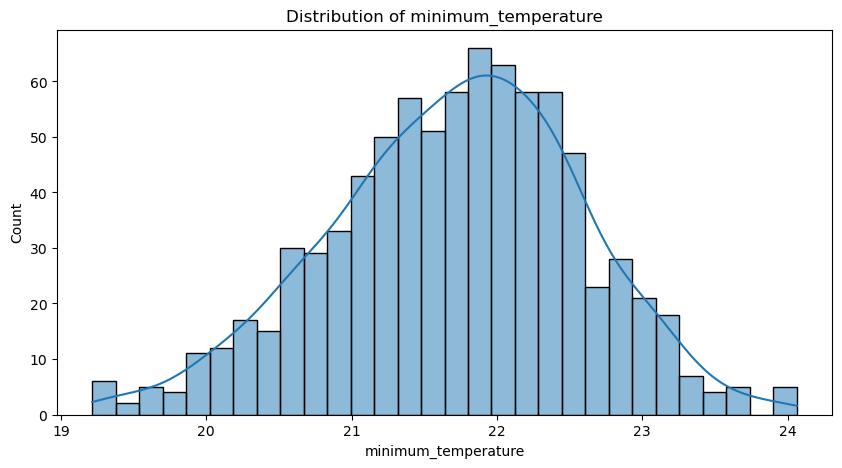

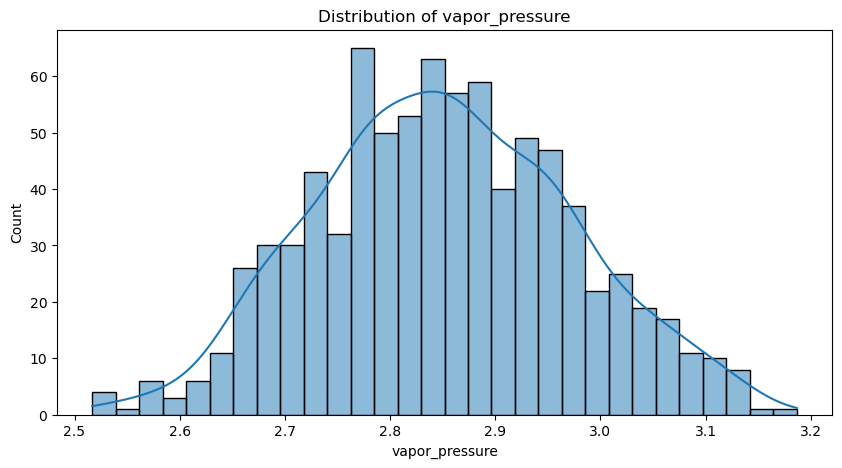

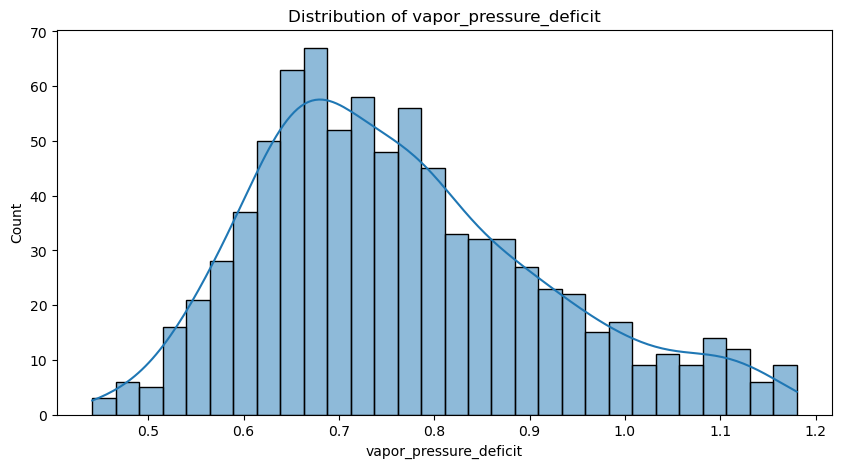

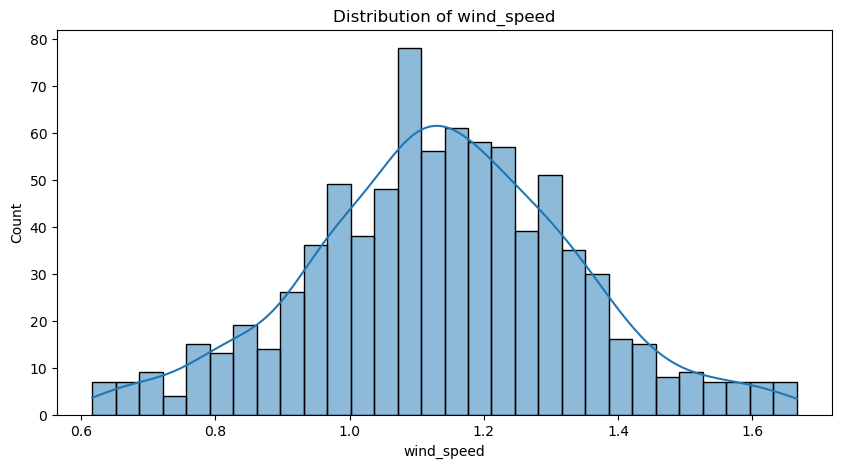

In [51]:
# 3.2 Distribution Visualizations
def distribution_visualizations(data, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

distribution_visualizations(df_TerrClimate, numeric_columns)

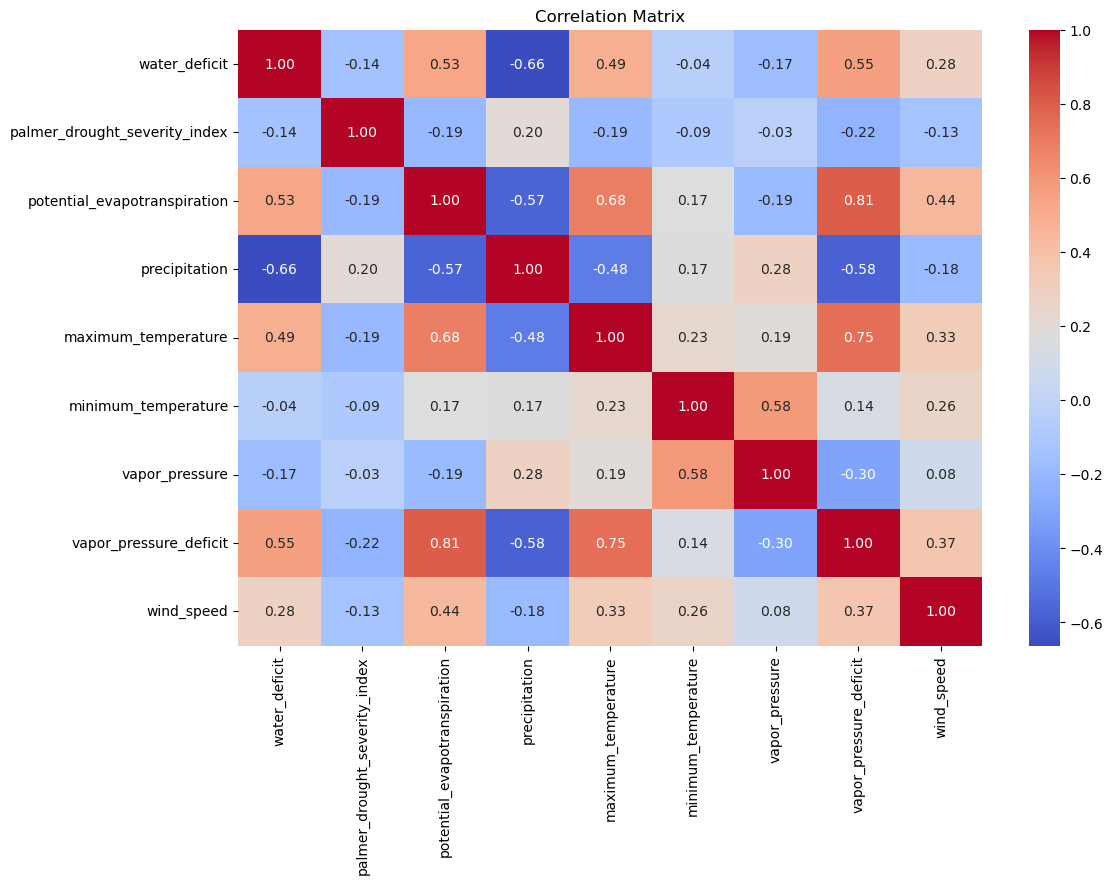

In [52]:
# 3.3 Correlation Analysis
def correlation_analysis(data, numeric_columns):
    correlation_matrix = data[numeric_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

correlation_analysis(df_TerrClimate, numeric_columns)

### Understanding Negative Correlation
A negative value in the correlation matrix indicates an inverse relationship between two variables. 
As one variable increases, the other tends to decrease. The closer the value is to -1, the stronger the inverse relationship.